# 분류 모델 실습

## pima-indians-diabetes.csv 파일을 읽어서, 당뇨병을 분류하는 모델을 만드시오.

컬럼 정보 :

Preg=no. of pregnancy

Plas=Plasma

Pres=blood pressure

skin=skin thickness

test=insulin test

mass=body mass

pedi=diabetes pedigree function

age=age

class=target(diabetes of not, 1:diabetic, 0:not diabetic)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('../data/pima-indians-diabetes.csv')
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
df.loc[ : ,'Plas' : 'mass' ] = df.loc[ : ,'Plas' : 'mass' ].replace (0, np.nan)

C:\Users\406\AppData\Local\Temp\ipykernel_3964\3238512999.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.  nan  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 1

In [6]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [7]:
df.isna().sum()

Preg       0
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [8]:
# (inplace=True) 데이터에 반영하라
df.dropna(inplace=True)
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [9]:
y = df['class']

In [33]:
X = df.drop('class', axis = 1)

In [34]:
x.head(2)

,Preg,Plas,Pres,skin,test,mass,pedi,age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [35]:
y.head(2)

3    0
4    1
Name: class, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
scaler_X = StandardScaler()

In [38]:
X_scaled = scaler_X.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state= 11  )

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
classifier = LogisticRegression()

In [75]:
classifier.fit(X_train, y_train )

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [78]:
y_pred = classifier.predict(X_test)

In [79]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [80]:
y_test

395    1
310    1
472    1
88     1
354    1
      ..
388    1
449    1
365    0
358    1
74     0
Name: class, Length: 105, dtype: int64

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [82]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[31, 12],
       [16, 46]])

In [84]:
(47 + 10) / cm.sum()

np.float64(0.5428571428571428)

In [ ]:
df['class'].value_counts()

In [ ]:
sb.countplot(data = df , x = 'class')
plt.show()

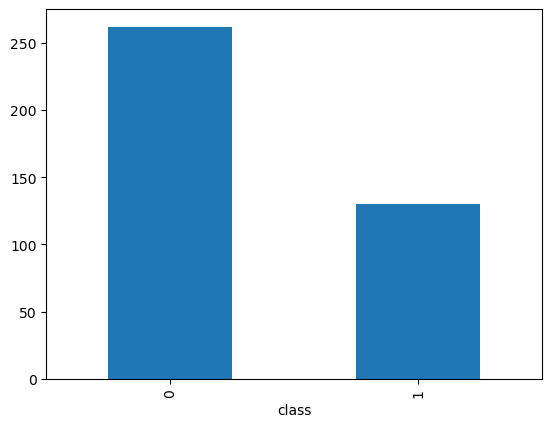

In [48]:
df['class'].value_counts().plot(kind='bar')
plt.show()

In [49]:
! pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state = 11)

In [53]:
X,y = sm.fit_resample(X,y)

In [54]:
X.shape

(524, 8)

In [56]:
y.shape

(524,)

In [58]:
X.head(3)

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26


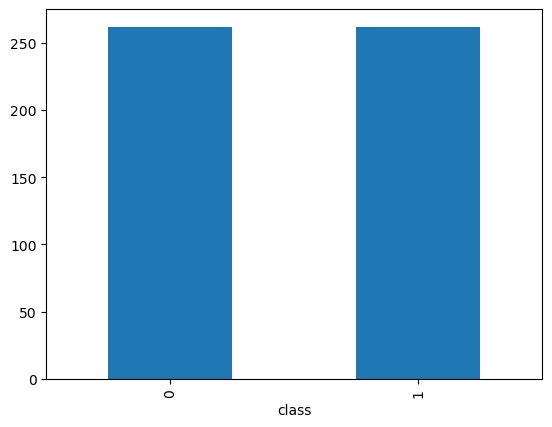

In [61]:
y.value_counts().plot(kind='bar')
plt.show()

In [85]:
scaler_X = StandardScaler()

In [86]:
X_scaled = scaler_X.fit_transform(X)

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=11)

In [88]:
classifier2 = LogisticRegression() 

In [89]:
classifier2 .fit(X_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
y_pred = classifier2.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred)

0.7333333333333333